# Geographic wine data

## Libraries and settings

In [9]:
# Libraries
import os
import requests
import json
import urllib
import fnmatch
import folium
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Get current working directory
print(os.getcwd())

/Users/bastian/vs_code/wine_analysis/notebooks


### Importing wine data

In [10]:
import mysql.connector
import pandas as pd

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="rootroot",
    database="wines"
)

# Step 2: Query data from the database
query = """
SELECT 
    ps.web_scraper_order AS wine_id,
    p.price_per_10cl,
    p.bio,
    p.wine_category,
    p.non_alcoholic,
    p.premium,
    c.country_name AS country,
    c.longitude,
    c.latitude
FROM Products p
JOIN Countries c ON p.country_id = c.country_id
JOIN ProductSources ps ON p.product_id = ps.product_id;
"""
df = pd.read_sql(query, connection)

# Step 3: Close the database connection
connection.close()

# Step 4: Display data information
# Get number of rows and columns
print(df.shape)

# Show first 10 records
print(df.head(10))


(3240, 9)
         wine_id  price_per_10cl  bio  wine_category  non_alcoholic  premium  \
0   1734709733-1            1.59    1     SCHAUMWEIN              0        0   
1   1734709733-3            1.69    0      WEISSWEIN              0        1   
2   1734709733-4            1.46    0     SCHAUMWEIN              0        1   
3   1734709733-5            3.21    0  UNCATEGORIZED              0        0   
4   1734709733-6            2.60    0     SCHAUMWEIN              0        0   
5   1734709733-7            0.93    0     SCHAUMWEIN              0        0   
6   1734709733-8            1.33    0      WEISSWEIN              0        0   
7   1734709733-9            0.73    0     SCHAUMWEIN              0        0   
8  1734709733-10            1.73    0        ROTWEIN              0        0   
9  1734709733-11            1.86    0        ROTWEIN              0        0   

      country  longitude   latitude  
0     Italien  12.567380  41.871940  
1     Schweiz   8.227512  46.8181

### Wine distribution by countries

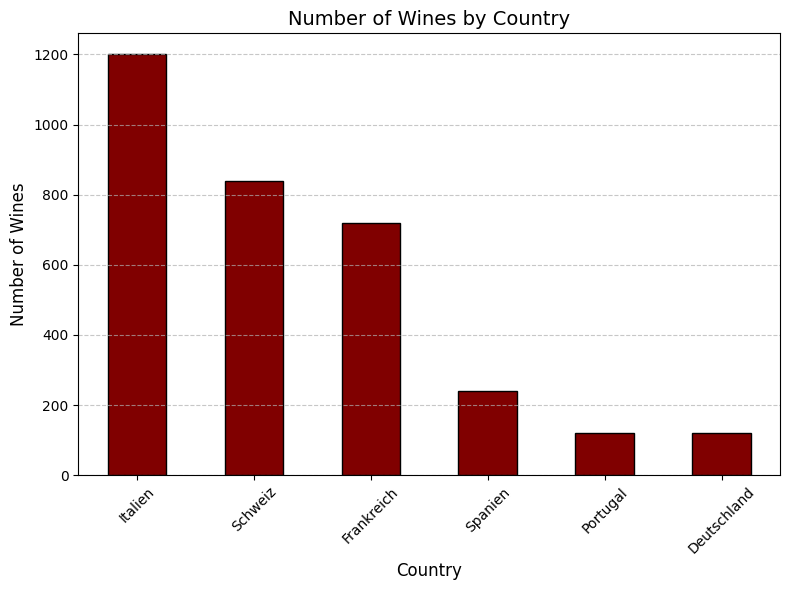

In [11]:
# Group by 'country' and count the number of wines
country_counts = df['country'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
country_counts.plot(kind='bar', color='maroon', edgecolor='black')

# Add labels and title
plt.title('Number of Wines by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Plot countries on map

In [12]:
# Initialisierung der Map
m = folium.Map(location=[47.44, 8.65], zoom_start=4)

# Add lat/lon of addresses
df_sub = df.dropna()
for i in range(0, len(df_sub)):
    folium.Marker(location=(df_sub.iloc[i]['latitude'], 
                            df_sub.iloc[i]['longitude']), 
                    popup=df_sub.iloc[i]['wine_category']).add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Plot map
m